## Machine Learning for Data Analysis

***

## Running a Classification Tree

Run a Classification Tree.

You will need to perform a decision tree analysis to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import sklearn

import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta

import scipy.stats


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.cluster import KMeans

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("gapminderfinal.csv")

In [3]:
df

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate,demoscorecat,politycat
0,48.67,0,55.70,24.04,6.68,0.40,1,0
1,76.92,9,51.40,46.72,7.70,0.40,3,1
2,73.13,2,50.50,65.22,4.85,0.10,2,1
3,73.13,6,58.70,88.92,5.36,0.40,3,1
4,51.09,-2,75.70,56.70,14.55,2.00,1,0
...,...,...,...,...,...,...,...,...
208,75.18,-7,71.00,27.84,11.65,0.40,0,0
209,72.83,6,32.00,71.90,8.26,0.40,3,1
210,65.49,-2,39.00,30.64,6.27,0.40,1,0
211,49.02,7,61.00,35.42,12.02,13.50,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lifeexpectancy   213 non-null    float64
 1   polityscore      213 non-null    int64  
 2   employrate       213 non-null    float64
 3   urbanrate        213 non-null    float64
 4   suicideper100th  213 non-null    float64
 5   hivrate          213 non-null    float64
 6   demoscorecat     213 non-null    int64  
 7   politycat        213 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 13.4 KB


In [5]:
df.describe(include='all')

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate,demoscorecat,politycat
count,213.00,213.00,213.00,213.00,213.00,213.00,213.00,213.00
mean,70.10,4.25,58.65,56.82,9.50,1.46,2.31,0.76
std,9.25,5.58,9.61,23.28,5.98,3.70,1.08,0.43
min,47.79,-10.00,32.00,10.40,0.20,0.06,0.00,0.00
25%,65.49,1.00,53.50,37.34,5.63,0.20,2.00,1.00
50%,73.13,6.00,58.70,57.94,8.26,0.40,3.00,1.00
75%,76.07,8.00,63.70,73.50,11.98,0.80,3.00,1.00
max,83.39,10.00,83.20,100.00,35.75,25.90,3.00,1.00


In [6]:
df.shape

(213, 8)

In [7]:
df.columns

Index(['lifeexpectancy', 'polityscore', 'employrate', 'urbanrate', 'suicideper100th', 'hivrate', 'demoscorecat', 'politycat'], dtype='object')

In [8]:
df.drop(["polityscore","demoscorecat"], axis=1, inplace=True)

In [9]:
df.head()

,lifeexpectancy,employrate,urbanrate,suicideper100th,hivrate,politycat
0,48.67,55.70,24.04,6.68,0.40,0
1,76.92,51.40,46.72,7.70,0.40,1
2,73.13,50.50,65.22,4.85,0.10,1
3,73.13,58.70,88.92,5.36,0.40,1
4,51.09,75.70,56.70,14.55,2.00,0


### Train Test Split

In [10]:
X = df.iloc[:,0:5]
y = df.iloc[:,5]

In [11]:
X.values, y.values

(array([[48.673     , 55.70000076, 24.04      ,  6.6843853 ,  0.4       ],
        [76.918     , 51.40000153, 46.72      ,  7.69932985,  0.4       ],
        [73.131     , 50.5       , 65.22      ,  4.84876966,  0.1       ],
        ...,
        [65.493     , 39.        , 30.64      ,  6.26578903,  0.4       ],
        [49.025     , 61.        , 35.42      , 12.01903629, 13.5       ],
        [51.384     , 66.80000305, 37.34      , 13.90526676, 14.3       ]]),
 array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, stratify=y)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 5), (43, 5), (170,), (43,))

In [14]:
X_train

array([[ 68.944     ,  68.09999847,  27.14      ,  14.53835678,
          0.06      ],
       [ 73.131     ,  58.69999886,  80.46      ,   5.55427647,
          0.4       ],
       [ 61.597     ,  64.90000153,  20.72      ,   8.9133625 ,
          0.8       ],
       [ 81.804     ,  73.59999847,  92.26      ,  11.42618084,
          0.3       ],
       [ 73.131     ,  58.69999886,  32.32      ,   8.26289272,
          0.4       ],
       [ 67.714     ,  58.90000153,  36.28      ,   9.875281  ,
          0.3       ],
       [ 79.143     ,  56.        ,  75.66      ,  10.57191   ,
          0.1       ],
       [ 47.794     ,  63.79999924,  37.76      ,  11.98049736,
          1.6       ],
       [ 75.446     ,  53.40000153,  56.56      ,  10.64574   ,
          0.06      ],
       [ 73.131     ,  58.69999886,  43.84      ,   8.26289272,
          0.4       ],
       [ 72.444     ,  58.69999886,  23.        ,   5.54232359,
          0.4       ],
       [ 74.241     ,  40.09999847,  63.86 

In [15]:
minmax = MinMaxScaler()

In [16]:
X_train_scaled = minmax.fit_transform(X_train)

In [17]:
X_test_scaled = minmax.transform(X_test)

In [18]:
X_train_scaled

array([[0.59410112, 0.6873706 , 0.16693346, 0.39781691, 0.        ],
       [0.71171348, 0.49275361, 0.77658358, 0.14279996, 0.01374293],
       [0.38772472, 0.62111807, 0.09352847, 0.23814905, 0.02991108],
       [0.95533708, 0.80124225, 0.9115024 , 0.30947647, 0.00970089],
       [0.71171348, 0.49275361, 0.22616053, 0.21968519, 0.01374293],
       [0.55955056, 0.49689446, 0.27143837, 0.26545352, 0.00970089],
       [0.88058989, 0.43685301, 0.72170135, 0.28522763, 0.00161681],
       [0.        , 0.59834369, 0.28836039, 0.32521098, 0.06224737],
       [0.77674157, 0.38302281, 0.5033158 , 0.28732332, 0.        ],
       [0.71171348, 0.49275361, 0.35787789, 0.21968519, 0.01374293],
       [0.69241573, 0.49275361, 0.11959753, 0.14246067, 0.01374293],
       [0.74289326, 0.1076604 , 0.58678253, 0.09134602, 0.00161681],
       [0.17758427, 1.        , 0.00503087, 0.33397141, 0.26030719],
       [0.62724719, 0.55072466, 0.00777498, 0.39806699, 0.05820534],
       [0.79106742, 0.49275361, 0.

In [19]:
X_test_scaled

array([[ 0.74775281,  0.25672876,  0.62840155,  0.55744671,  0.        ],
       [ 0.75058989,  0.13871631,  0.61696776,  0.07446311,  0.        ],
       [ 0.03457865,  0.54037269,  0.26160531,  0.32630492,  0.5432498 ],
       [ 0.94789326,  0.33747414,  0.74113881,  0.38513354,  0.01374293],
       [ 0.7958427 ,  0.2857143 ,  0.55774068,  0.37223322,  0.00161681],
       [ 0.93629213,  0.56935823,  1.        ,  0.24422774,  0.00161681],
       [ 0.07351124,  1.        , -0.02446833,  0.40186408,  0.130962  ],
       [ 0.32370787,  0.63561076,  0.34118454,  0.17848504,  0.03395311],
       [ 0.89317416,  0.50103518,  0.65584267,  0.0477625 ,  0.01374293],
       [ 0.41210674,  0.14699791,  0.2778413 ,  0.21284648,  0.52708165],
       [ 0.71755618,  0.45341614,  0.63549051,  0.56333896,  0.02586904],
       [ 0.9252809 ,  0.54658386,  0.79213355,  0.21687821,  0.00565885],
       [ 0.52876404,  0.73498972,  0.60644866,  0.04288047,  0.00565885],
       [ 0.0169382 ,  0.64803309,  0.2

In [20]:
dtmodel = DecisionTreeClassifier()

In [21]:
dtmodel.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [22]:
dtpred = dtmodel.predict(X_test_scaled)

dtpred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [23]:
cm = confusion_matrix(y_test,dtpred)
cm

array([[ 1,  9],
       [ 6, 27]], dtype=int64)

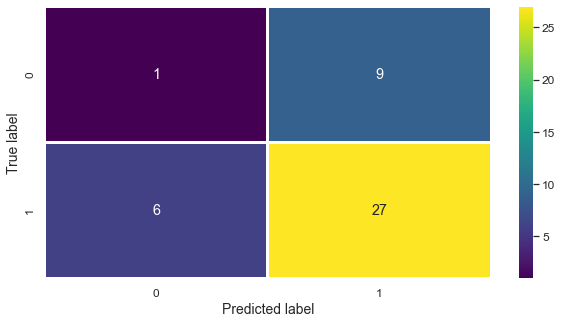

In [24]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

           0       0.14      0.10      0.12        10
           1       0.75      0.82      0.78        33

    accuracy                           0.65        43
   macro avg       0.45      0.46      0.45        43
weighted avg       0.61      0.65      0.63        43



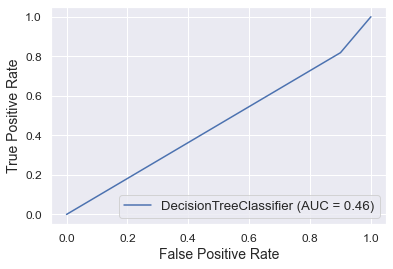

In [26]:
plot_roc_curve(dtmodel,X_test_scaled,y_test)
plt.show()

The model only performs averagely, the precision for 0 is poor, predicts 1/7.

***

## Running a Random Forest

Run a Random Forest. 

You will need to perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable.

In [27]:
rfmodel = RandomForestClassifier()

In [28]:
rfmodel.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [29]:
rfpred = rfmodel.predict(X_test_scaled)

rfpred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [30]:
cm = confusion_matrix(y_test,rfpred)
cm

array([[ 2,  8],
       [ 4, 29]], dtype=int64)

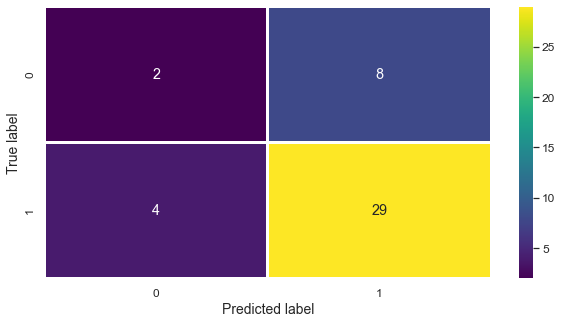

In [31]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.33      0.20      0.25        10
           1       0.78      0.88      0.83        33

    accuracy                           0.72        43
   macro avg       0.56      0.54      0.54        43
weighted avg       0.68      0.72      0.69        43



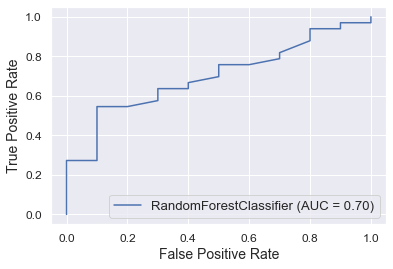

In [33]:
plot_roc_curve(rfmodel,X_test_scaled,y_test)
plt.show()

The model performs better than decision tree, the precision for 0 slightly better, predicts 2/6. AUC increased to 0.70.

***

## Running a Lasso Regression Analysis

Your assignment is to run a lasso regression analysis using k-fold cross validation to identify a subset of predictors from a larger pool of predictor variables that best predicts a quantitative response variable. 

In [34]:
df.head()

,lifeexpectancy,employrate,urbanrate,suicideper100th,hivrate,politycat
0,48.67,55.70,24.04,6.68,0.40,0
1,76.92,51.40,46.72,7.70,0.40,1
2,73.13,50.50,65.22,4.85,0.10,1
3,73.13,58.70,88.92,5.36,0.40,1
4,51.09,75.70,56.70,14.55,2.00,0


In [35]:
X = df.iloc[:,1:5]
y = df.iloc[:,1]

In [36]:
X.values, y.values

(array([[ 55.70000076,  24.04      ,   6.6843853 ,   0.4       ],
        [ 51.40000153,  46.72      ,   7.69932985,   0.4       ],
        [ 50.5       ,  65.22      ,   4.84876966,   0.1       ],
        [ 58.69999886,  88.92      ,   5.3621788 ,   0.4       ],
        [ 75.69999695,  56.7       ,  14.55467701,   2.        ],
        [ 58.69999886,  30.46      ,   2.1618433 ,   0.4       ],
        [ 58.40000153,  92.        ,   7.765584  ,   0.5       ],
        [ 40.09999847,  63.86      ,   3.74158788,   0.1       ],
        [ 58.69999886,  46.78      ,   8.26289272,   0.4       ],
        [ 61.5       ,  88.74      ,   8.47003012,   0.1       ],
        [ 57.09999847,  67.16      ,  13.09437   ,   0.3       ],
        [ 60.90000153,  51.92      ,   1.38096464,   0.1       ],
        [ 66.59999847,  83.7       ,   3.37441587,   3.1       ],
        [ 60.40000153,  88.52      ,   4.41499043,   0.4       ],
        [ 68.09999847,  27.14      ,  14.53835678,   0.06      ],
        [ 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 4), (43, 4), (170,), (43,))

In [39]:
X_train

array([[ 53.40000153,  73.46      ,  26.8746903 ,   0.3       ],
       [ 61.79999924,  17.24      ,  11.65520954,   0.4       ],
       [ 46.90000153,  41.        ,   6.88295221,   0.7       ],
       [ 70.40000153,  65.58      ,   2.03417849,   0.2       ],
       [ 58.90000153,  28.38      ,  35.75287247,   1.2       ],
       [ 59.90000153,  48.78      ,  20.31793022,   3.4       ],
       [ 58.69999886,  93.16      ,   8.26289272,   0.4       ],
       [ 75.69999695,  56.7       ,  14.55467701,   2.        ],
       [ 48.59999847,  77.54      ,   4.66702461,   0.4       ],
       [ 59.90000153,  93.32      ,   4.11962   ,   0.4       ],
       [ 58.59999847,  63.26      ,   6.597168  ,   0.3       ],
       [ 58.69999886,  64.78      ,   8.26289272,   0.4       ],
       [ 58.69999886,  73.92      ,   5.83525085,   0.4       ],
       [ 59.        ,  85.04      ,   7.74506473,   5.2       ],
       [ 63.79999924,  74.82      ,   1.37000155,   0.4       ],
       [ 58.69999886,  41

In [40]:
minmax = MinMaxScaler()

In [41]:
X_train_scaled = minmax.fit_transform(X_train)

In [42]:
X_test_scaled = minmax.transform(X_test)

In [43]:
X_train_scaled

array([[0.4179688 , 0.70379464, 0.75027211, 0.00970089],
       [0.58203127, 0.07633929, 0.32217446, 0.01374293],
       [0.29101567, 0.34151786, 0.18793913, 0.02586904],
       [0.75000007, 0.61584821, 0.05155152, 0.00565885],
       [0.52539069, 0.20066964, 1.        , 0.04607922],
       [0.54492194, 0.42834821, 0.5658418 , 0.13500404],
       [0.52148438, 0.92366071, 0.22675446, 0.01374293],
       [0.85351562, 0.51674107, 0.40373146, 0.07841552],
       [0.32421874, 0.74933036, 0.12560892, 0.01374293],
       [0.54492194, 0.92544643, 0.11021137, 0.01374293],
       [0.51953125, 0.58995536, 0.17990051, 0.00970089],
       [0.52148438, 0.60691964, 0.22675446, 0.01374293],
       [0.52148438, 0.70892857, 0.1584691 , 0.01374293],
       [0.52734378, 0.83303571, 0.21218886, 0.20776071],
       [0.62109377, 0.71897321, 0.03286937, 0.01374293],
       [0.52148438, 0.34620536, 0.22675446, 0.01374293],
       [0.5       , 0.54754464, 0.22465842, 0.021827  ],
       [0.85937505, 0.95133929,

In [44]:
X_test_scaled

array([[0.2109375 , 0.65044643, 0.09456375, 0.        ],
       [0.37109377, 0.87098214, 0.28045069, 0.01374293],
       [0.10546879, 0.62723214, 0.47343244, 0.01374293],
       [0.52148438, 0.55982143, 0.28948773, 0.01374293],
       [0.80273439, 0.55691964, 0.1183661 , 0.00970089],
       [0.21679686, 0.53058036, 0.22675446, 0.01374293],
       [0.61914068, 0.53058036, 0.70892101, 0.00161681],
       [0.4199219 , 0.91830357, 0.22675446, 0.01374293],
       [0.52148438, 0.22388393, 0.05514251, 0.01374293],
       [0.52734378, 1.        , 0.22675446, 0.01374293],
       [0.20312504, 0.36071429, 0.04496177, 0.        ],
       [0.64453129, 0.74866071, 0.29876585, 0.00161681],
       [0.52343752, 0.696875  , 0.77838546, 0.03799515],
       [0.61718751, 1.        , 0.22675446, 0.01374293],
       [0.52148438, 0.228125  , 0.09493374, 0.01374293],
       [0.84374999, 0.753125  , 0.03351489, 0.01374293],
       [0.24023437, 0.35      , 0.43140442, 0.01374293],
       [0.67578126, 0.81808036,

In [45]:
lasso = LassoCV(verbose=True, cv=5, random_state=0)

In [46]:
lasso.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


LassoCV(cv=5, random_state=0, verbose=True)

In [47]:
lassopred = lasso.predict(X_test_scaled)

lassopred

array([42.81604395, 51.00784471, 37.42144623, 58.70014357, 73.08574318,
       43.11574318, 63.69514546, 53.50534471, 58.70014357, 58.99984471,
       42.41644623, 64.99384471, 58.80004395, 63.59524318, 58.70014357,
       75.18364166, 44.31454395, 66.59224318, 60.99784471, 44.21464546,
       50.90794623, 83.17564166, 58.50034471, 54.60424318, 58.70014357,
       56.80204395, 62.39644623, 66.89194623, 55.40344623, 58.70014357,
       40.11874318, 57.20164546, 60.39844623, 73.18564166, 61.29754395,
       58.70014357, 55.90294623, 48.71014546, 59.89894623, 71.98684471,
       56.30254395, 52.50634471, 64.99384471])

In [48]:
mse = mean_squared_error(y_test,lassopred)
mse

9.484787969598183e-05

In [49]:
rmse = np.sqrt(mse)
rmse

0.00973898761145027

In [50]:
r2score = r2_score(y_test,lassopred)
r2score

0.9999989897302989

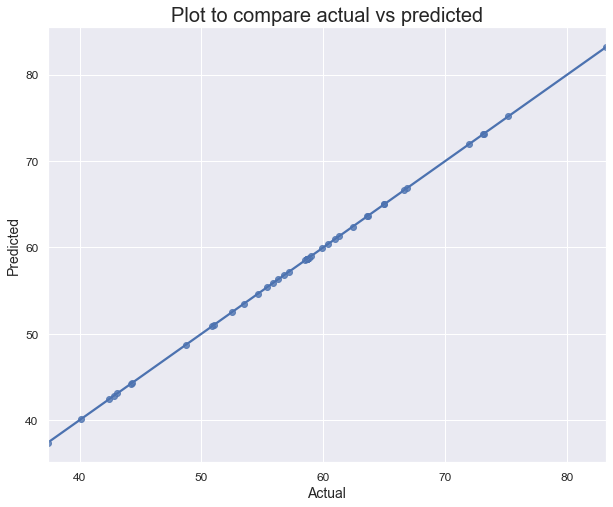

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=lassopred, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

The results are very good with minimum RMSE score and very high R2 score. This means the exploratory variables used are strongly related to life expectency.

***

## Running a k-means Cluster Analysis

Your assignment is to run a k-means cluster analysis to
identify subgroups of observations in your data set that have similar patterns of response on a set of clustering variables. 

In [52]:
df.head()

,lifeexpectancy,employrate,urbanrate,suicideper100th,hivrate,politycat
0,48.67,55.70,24.04,6.68,0.40,0
1,76.92,51.40,46.72,7.70,0.40,1
2,73.13,50.50,65.22,4.85,0.10,1
3,73.13,58.70,88.92,5.36,0.40,1
4,51.09,75.70,56.70,14.55,2.00,0


In [53]:
df.drop(["politycat"], axis=1, inplace=True)

In [54]:
df

,lifeexpectancy,employrate,urbanrate,suicideper100th,hivrate
0,48.67,55.70,24.04,6.68,0.40
1,76.92,51.40,46.72,7.70,0.40
2,73.13,50.50,65.22,4.85,0.10
3,73.13,58.70,88.92,5.36,0.40
4,51.09,75.70,56.70,14.55,2.00
...,...,...,...,...,...
208,75.18,71.00,27.84,11.65,0.40
209,72.83,32.00,71.90,8.26,0.40
210,65.49,39.00,30.64,6.27,0.40
211,49.02,61.00,35.42,12.02,13.50


In [55]:
X = df.iloc[:,0:4]

In [56]:
X.values

array([[ 48.673     ,  55.70000076,  24.04      ,   6.6843853 ],
       [ 76.918     ,  51.40000153,  46.72      ,   7.69932985],
       [ 73.131     ,  50.5       ,  65.22      ,   4.84876966],
       [ 73.131     ,  58.69999886,  88.92      ,   5.3621788 ],
       [ 51.093     ,  75.69999695,  56.7       ,  14.55467701],
       [ 73.131     ,  58.69999886,  30.46      ,   2.1618433 ],
       [ 75.901     ,  58.40000153,  92.        ,   7.765584  ],
       [ 74.241     ,  40.09999847,  63.86      ,   3.74158788],
       [ 75.246     ,  58.69999886,  46.78      ,   8.26289272],
       [ 81.907     ,  61.5       ,  88.74      ,   8.47003012],
       [ 80.854     ,  57.09999847,  67.16      ,  13.09437   ],
       [ 70.739     ,  60.90000153,  51.92      ,   1.38096464],
       [ 75.62      ,  66.59999847,  83.7       ,   3.37441587],
       [ 75.057     ,  60.40000153,  88.52      ,   4.41499043],
       [ 68.944     ,  68.09999847,  27.14      ,  14.53835678],
       [ 76.835     ,  66

In [57]:
scaler = StandardScaler()

In [58]:
X_scaled = scaler.fit_transform(X)

In [59]:
X_scaled

array([[-2.3224868 , -0.3072641 , -1.41175552, -0.4717681 ],
       [ 0.73866884, -0.75567586, -0.43511132, -0.30162019],
       [ 0.32823881, -0.84952966,  0.36153408, -0.77949544],
       [ 0.32823881,  0.00558118,  1.38210143, -0.69342621],
       [-2.06021041,  1.778372  , -0.00535342,  0.84762787],
       [ 0.32823881,  0.00558118, -1.13529804, -1.22993869],
       [ 0.62844773, -0.02570309,  1.51473213, -0.29051317],
       [ 0.44853913, -1.9340608 ,  0.30296988, -0.96510624],
       [ 0.5574597 ,  0.00558118, -0.43252761, -0.20714306],
       [ 1.27937005,  0.29757041,  1.37435029, -0.17241801],
       [ 1.1652473 , -0.16126978,  0.44507419,  0.60281824],
       [ 0.06899702,  0.23500147, -0.21118937, -1.3608472 ],
       [ 0.59799333,  0.82940755,  1.15731824, -1.0266599 ],
       [ 0.53697613,  0.18286056,  1.36487667, -0.85221531],
       [-0.1255427 ,  0.98583029, -1.27826359,  0.8448919 ],
       [ 0.72967341,  0.86069242, -0.73137729, -1.07122154],
       [ 0.02672934, -0.

In [60]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

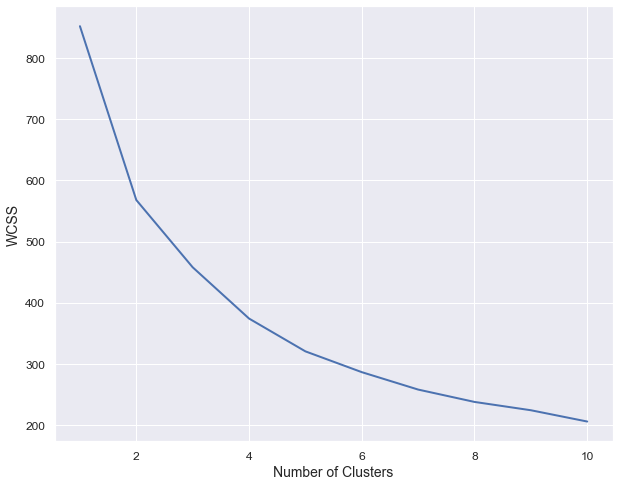

In [61]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [62]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [63]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [64]:
df_segm_kmeans = df.copy()

In [65]:
df_segm_kmeans

,lifeexpectancy,employrate,urbanrate,suicideper100th,hivrate
0,48.67,55.70,24.04,6.68,0.40
1,76.92,51.40,46.72,7.70,0.40
2,73.13,50.50,65.22,4.85,0.10
3,73.13,58.70,88.92,5.36,0.40
4,51.09,75.70,56.70,14.55,2.00
...,...,...,...,...,...
208,75.18,71.00,27.84,11.65,0.40
209,72.83,32.00,71.90,8.26,0.40
210,65.49,39.00,30.64,6.27,0.40
211,49.02,61.00,35.42,12.02,13.50


In [66]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [67]:
df_segm_kmeans

,lifeexpectancy,employrate,urbanrate,suicideper100th,hivrate,Segment K-Means
0,48.67,55.70,24.04,6.68,0.40,1
1,76.92,51.40,46.72,7.70,0.40,2
2,73.13,50.50,65.22,4.85,0.10,2
3,73.13,58.70,88.92,5.36,0.40,2
4,51.09,75.70,56.70,14.55,2.00,1
...,...,...,...,...,...,...
208,75.18,71.00,27.84,11.65,0.40,1
209,72.83,32.00,71.90,8.26,0.40,2
210,65.49,39.00,30.64,6.27,0.40,1
211,49.02,61.00,35.42,12.02,13.50,1


In [68]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [69]:
df_segm_analysis

,lifeexpectancy,employrate,urbanrate,suicideper100th,hivrate
Segment K-Means,,,,,
0,70.66,55.48,54.39,20.89,1.08
1,60.17,64.15,32.37,8.98,3.43
2,75.52,56.35,71.10,6.99,0.45


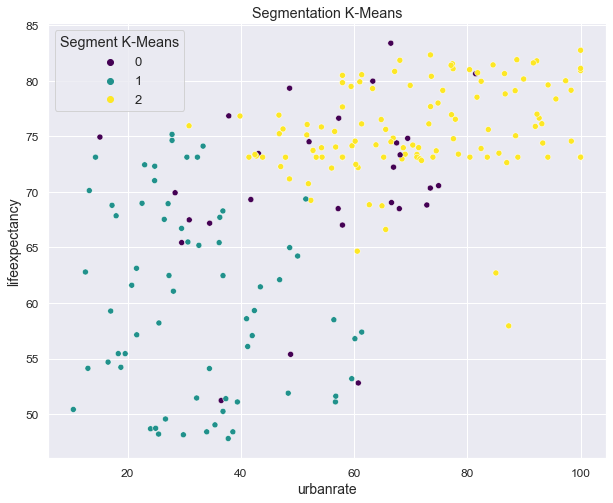

In [70]:
x_axis = df_segm_kmeans['urbanrate']
y_axis = df_segm_kmeans['lifeexpectancy']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis,hue=df_segm_kmeans["Segment K-Means"],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()

From the graph, at least 2 segments ( yellow vs green) is clearly separated. The overlapping purple points are problematic.

#### Python code done by Dennis Lam